**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Load the Dataset**

In [10]:
df = pd.read_csv("amazon_reviews.csv")

In [11]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [17]:
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

**Check and Clean code**

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


In [14]:
df.dropna(inplace=True)

In [21]:
# Create sentiment column
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['overall'].apply(label_sentiment)

In [22]:
df = df[df['sentiment'] != 'Neutral']

**Visualize the Sentiment Distribution**

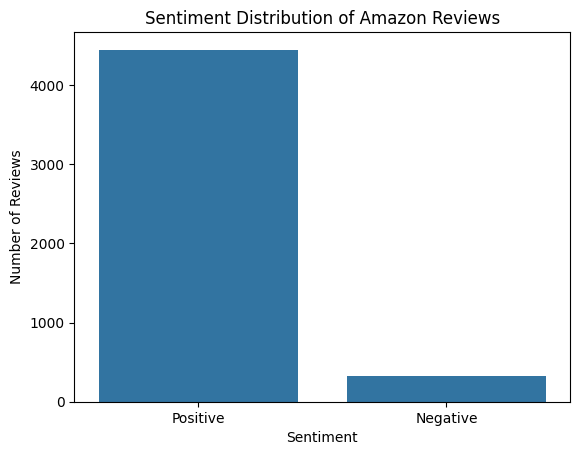

In [23]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

**Text Processing**

In [25]:
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['reviewText'].apply(clean_text)

/tmp/ipython-input-2658707421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['reviewText'].apply(clean_text)


**Convert Text into Numbers**

In [26]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment']

**Train-Test Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train the Model**

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Prediction and Evaluation**

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9350785340314136
              precision    recall  f1-score   support

    Negative       1.00      0.07      0.14        67
    Positive       0.93      1.00      0.97       888

    accuracy                           0.94       955
   macro avg       0.97      0.54      0.55       955
weighted avg       0.94      0.94      0.91       955



**Confusion Matrix Visualization**

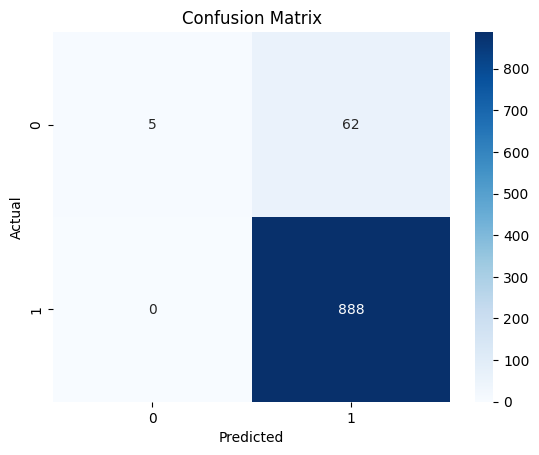

In [30]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Save the Model**

In [32]:
import pickle
pickle.dump(model, open("sentiment_model.pkl", "wb"))